# Ch3. Neural Network

$$
\mathsf{In\quad chapter\quad 2\quad we\quad have}
$$

$$
y=\begin{cases}
0,&(b+w_1x_1+w_2x_2\leq0) \\ 
1,&(b+w_1x_1+w_2x_2>0)
\end{cases}
$$

$$
\mathsf{then\quad we\quad put\quad in\quad} h(x)
$$

$$y = h(b+w_1x_1+w_2x_2)$$

$$
h(x)=\begin{cases}
0,&(x\leq0) \\
1,&(x>0)
\end{cases}
$$

$$\mathsf{we\quad call\quad it\quad "activation\quad function"}$$

# sigmoid Function

$$ h(x)=\frac{1}{1+exp(-x)}$$

In [82]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [83]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [84]:
y = x > 0
y

array([False,  True,  True])

In [85]:
y = y.astype(np.int)
y

array([0, 1, 1])

## Step Function

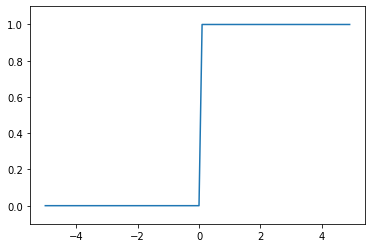

In [86]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x >0, dtype=np.int)
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # define y range
plt.show()

## sigmoid

In [87]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [88]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

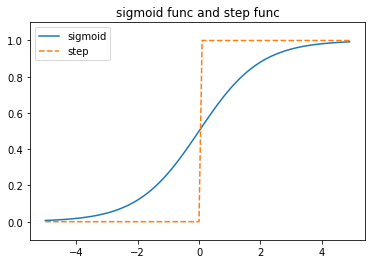

In [89]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)
plt.plot(x, y1, label='sigmoid')
plt.plot(x, y2, linestyle='--', label='step')
plt.ylim(-0.1, 1.1) # define y range
plt.title('sigmoid func and step func')
plt.legend()
plt.show()

# ReLU Function (Rectified Linear Unit)

$$
h(x)=\begin{cases}
x,&(x>0) \\
0,&(x\leq0)
\end{cases}
$$

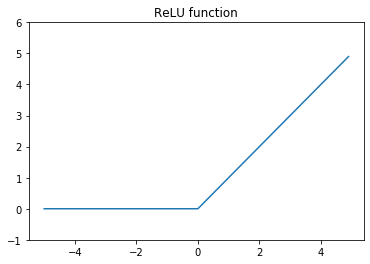

In [90]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1, 6) # define y range
plt.title('ReLU function')
plt.show()

# NumPy

In [91]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [92]:
np.ndim(A) #dimension

1

In [93]:
A.shape

(4,)

In [94]:
A.shape[0]

4

In [95]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [96]:
np.ndim(B)

2

In [97]:
B.shape

(3, 2)

In [98]:
A = np.array([[1,2], [3,4]])
print('A:',A.shape)
B = np.array([[5,6], [7,8]])
print('B:', B.shape)

A: (2, 2)
B: (2, 2)


In [99]:
np.dot(A, B) # matrix multiply

array([[19, 22],
       [43, 50]])

In [100]:
A = np.array([[1,2,3], [4,5,6]])
print('A:', A.shape)
B = np.array([[1,2], [3,4], [5,6]])
print('B:', B.shape)

A: (2, 3)
B: (3, 2)


In [101]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

## NumPy in neural network
see ch3_1.svg

In [102]:
X = np.array([1,2])
X.shape

(2,)

In [103]:
W = np.array([[1,3,5], [2,4,6]])
print(W)
print(W.shape)

[[1 3 5]
 [2 4 6]]
(2, 3)


In [104]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


see ch3_2.svg

$$a_1^{(1)}=w_{11}^{(1)}x_1+w_{12}^{(1)}x_2+b_1^{(1)}$$

$$A^{(1)}=XW^{(1)}+B^{(1)}$$

$$
\begin{align}
A^{(1)}&=(a_1^{(1)}\quad a_2^{(1)} \quad a_3^{(1)}) \\
X&=(x_1 \quad x_2) \\
B^{(1)}&=(b_1^{(1)}\quad b_2^{(1)} \quad b_3^{(1)}) \\
W^{(1)}&=\left\lgroup\begin{matrix}w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \cr w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)}\end{matrix}\right\rgroup
\end{align}
$$

In [105]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print('X:', X.shape)
print('W1:', W1.shape)
print('B1:', B1.shape)

X: (2,)
W1: (2, 3)
B1: (3,)


In [106]:
A1 = np.dot(X, W1) + B1

## see ch3_3.svg(input to layer1)

In [107]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


## see ch3_4(layer1 to layer2)

In [108]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)

[0.62624937 0.7710107 ]


## see ch3_5(layer2 to output)

In [109]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # Y = A3
print(Y)

[0.31682708 0.69627909]


# summary all layers

In [110]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


# Softmax function

$$y_k=\frac{exp(a_k)}{\sum_{i=0}^{n}{exp(a_i)}}$$

In [111]:
def softmax(a):
    c = np.max(a) # avoid overflow
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [112]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [113]:
np.sum(y)

1.0

# Forward propagation

In [114]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [115]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [116]:
print('x_train:',x_train.shape)
print('t_train:',t_train.shape)
print('x_test:', x_test.shape)
print('t_test:', t_test.shape)

x_train: (60000, 784)
t_train: (60000,)
x_test: (10000, 784)
t_test: (10000,)


In [117]:
import sys, os
sys.path.append(os.pardir)  
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  
print(img.shape)  # (28, 28)

img_show(img)

5
(784,)
(28, 28)


In [37]:
import sys, os
sys.path.append(os.pardir)  
import numpy as np
import pickle
from dataset.mnist import load_mnist
#from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("mnist.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) 
    accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/mnist.pkl'

In [74]:
import urllib.request
import os
import gzip
import pickle
import numpy as np

url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = os.getcwd()
save_file = dataset_dir + "/mnist.pkl"

for v in key_file.values():
    file_path = dataset_dir + "/" + v
    urllib.request.urlretrieve(url_base + v, file_path)
    
mnist = {
    'train_images':'',
    'train_labels':'',
    'test_images':'',
    'test_labels':''
}
with gzip.open('t10k-images-idx3-ubyte.gz', 'rb') as f:
    mnist['test_images'] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
with gzip.open('t10k-labels-idx1-ubyte.gz', 'rb') as f:
    mnist['test_labels'] = np.frombuffer(f.read(), np.uint8, offset=8)
with gzip.open('train-images-idx3-ubyte.gz', 'rb') as f:
    mnist['train_images'] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
with gzip.open('train-labels-idx1-ubyte.gz', 'rb') as f:
    mnist['train_labels'] = np.frombuffer(f.read(), np.uint8, offset=8)
with open('mnist.pkl', 'wb') as f:
    pickle.dump(mnist, f)
        

In [75]:
with open('mnist.pkl', 'rb') as f:
    dataset = pickle.load(f)

In [81]:
dataset.keys()

dict_keys(['train_images', 'train_labels', 'test_images', 'test_labels'])

In [119]:
for key in ('train_images', 'test_images'):
    dataset[key] = dataset[key].astype(np.float32)
    dataset[key] /= 255.0

In [123]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

x, t = dataset['test_images'], dataset['test_labels']
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) 
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
